# Importing all the neccessary libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Importing the dataset

In [2]:
df = pd.read_csv('/content/iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal-width', 'species'])

In [4]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal-width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# Constructing Feature vector and Target vector

In [5]:
X = df.iloc[:, :2]
print(X)

     sepal_length  sepal_width
0             5.1          3.5
1             4.9          3.0
2             4.7          3.2
3             4.6          3.1
4             5.0          3.6
..            ...          ...
145           6.7          3.0
146           6.3          2.5
147           6.5          3.0
148           6.2          3.4
149           5.9          3.0

[150 rows x 2 columns]


In [7]:
# converting virginica to 1 and all other to 0
Y = (df['species'] == 'Iris-virginica').astype(int)
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64


# Splitting the data in Training and Test sets

In [8]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [9]:
print(X_train)


     sepal_length  sepal_width
22            4.6          3.6
15            5.7          4.4
65            6.7          3.1
11            4.8          3.4
42            4.4          3.2
..            ...          ...
71            6.1          2.8
106           4.9          2.5
14            5.8          4.0
92            5.8          2.6
102           7.1          3.0

[120 rows x 2 columns]


# Creating Augmented Matrix by adding the bias term

In [10]:
# Making a augmented matrix by adding the bias term to X_train matrix
X_train = np.c_[np.ones((X_train.shape[0],1)),X_train]


In [11]:
# Making a augmented matrix by adding the bias term to X_test matrix
X_test = np.c_[np.ones((X_test.shape[0],1)), X_test]

In [12]:
print(X_test[:10, :3])

[[1.  6.1 2.8]
 [1.  5.7 3.8]
 [1.  7.7 2.6]
 [1.  6.  2.9]
 [1.  6.8 2.8]
 [1.  5.4 3.4]
 [1.  5.6 2.9]
 [1.  6.9 3.1]
 [1.  6.2 2.2]
 [1.  5.8 2.7]]


In [13]:
print(X_train[:10, :3])

[[1.  4.6 3.6]
 [1.  5.7 4.4]
 [1.  6.7 3.1]
 [1.  4.8 3.4]
 [1.  4.4 3.2]
 [1.  6.3 2.5]
 [1.  6.4 3.2]
 [1.  5.2 3.5]
 [1.  5.  3.6]
 [1.  5.2 4.1]]


# Sigmoid Function

In [14]:
#Sigmoid function

def Sigmoid(z):
  return 1 / (1 + np.exp(-z))

# Log-Likelihood Function

In [15]:
# Log-likelihood Function

def log_likelihood(X, Y, theta):
  z = np.dot(X, theta)
  return np.sum(Y * np.log(Sigmoid(z)) + (1 - Y) * np.log(1 - Sigmoid(z)))

# Gradient for Log-likelihood

In [16]:
# Gradient of Log-likelihood

def gradient(X, Y, theta):
  z = np.dot(X, theta)
  return np.dot(X.T, Sigmoid(z) - Y)

# Gradient Descent

In [17]:
# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    for i in range(num_iterations):
        grad = gradient(X, y, theta)
        theta -= learning_rate * grad
        if i%1000 == 0:
          log_likelihood_value = log_likelihood(X, y, theta)
          print(f'Iteration {i}, Log-likelihood: {log_likelihood_value}, Theta: {theta}')

    return theta


# Hyper-parameters-1

In [18]:
#Hyperparameters
learning_rate = 0.001
num_iterations = 20000

# Weight Initialzation

In [19]:
# Initialize weights (including bias) randomly
np.random.seed(0)
theta = np.random.rand(X_train.shape[1])
print(theta)

[0.5488135  0.71518937 0.60276338]


# Function to train the model

In [20]:
# Train the logistic regression model using gradient descent
theta = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

Iteration 0, Log-likelihood: -252.83218814759272, Theta: [0.46801948 0.27400272 0.35217236]
Iteration 1000, Log-likelihood: -55.93987782512623, Theta: [-1.68448789  1.30364659 -2.26944883]
Iteration 2000, Log-likelihood: -53.82661117243326, Theta: [-3.1177799   1.46884137 -2.12669149]
Iteration 3000, Log-likelihood: -52.37068457013286, Theta: [-4.30436986  1.57552471 -1.94558359]
Iteration 4000, Log-likelihood: -51.34522967656941, Theta: [-5.30060056  1.66620562 -1.7961021 ]
Iteration 5000, Log-likelihood: -50.61135867965598, Theta: [-6.14398172  1.74531807 -1.67463496]
Iteration 6000, Log-likelihood: -50.07793615212255, Theta: [-6.86343628  1.81451733 -1.5747117 ]
Iteration 7000, Log-likelihood: -49.68465684135023, Theta: [-7.48147538  1.8751559  -1.49144807]
Iteration 8000, Log-likelihood: -49.39101679659238, Theta: [-8.01570645  1.92841718 -1.42129717]
Iteration 9000, Log-likelihood: -49.169336199553165, Theta: [-8.48001926  1.97531835 -1.36164237]
Iteration 10000, Log-likelihood: -

# Function to make predictions

In [21]:
# Predictions
def predict(X, theta):
    return Sigmoid(np.dot(X, theta))

# Making predictions

In [22]:
# Evaluate on the test set
y_pred = predict(X_test, theta)
y_pred_binary = (y_pred >= 0.5).astype(int)


# Calculating the Accuracy of Model

In [23]:
# Calculate accuracy
accuracy = np.mean(y_pred_binary == y_test)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 90.00%


# Plotting Decision boundary on testing data

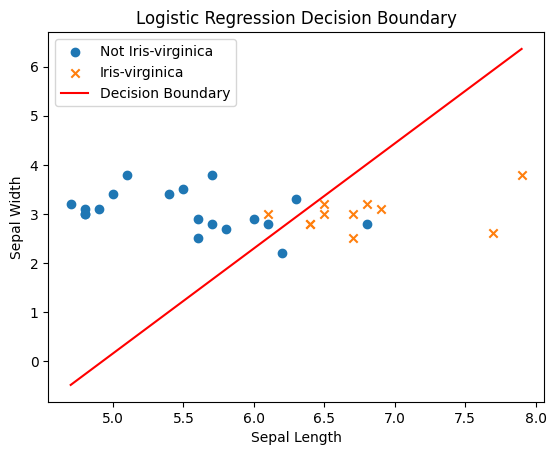

In [24]:
# Decision Boundary
x_values = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)
y_values = -(theta[0] + theta[1] * x_values) / theta[2]

# Plotting the data points
plt.scatter(X_test[y_test == 0][:, 1], X_test[y_test == 0][:, 2], label='Not Iris-virginica', marker='o')
plt.scatter(X_test[y_test == 1][:, 1], X_test[y_test == 1][:, 2], label='Iris-virginica', marker='x')

# Plotting the decision boundary
plt.plot(x_values, y_values, color='red', label='Decision Boundary')

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()




# Hyper-Parameters - 2

In [27]:
learning_rate_2 = 0.0001
num_iterations_2 = 30000

In [28]:
# Initialize weights (including bias) randomly
np.random.seed(0)
theta = np.random.rand(X_train.shape[1])

In [29]:
# Train the logistic regression model using gradient descent
theta = gradient_descent(X_train, y_train, theta, learning_rate_2, num_iterations_2)

Iteration 0, Log-likelihood: -486.01754325644316, Theta: [0.5407341  0.6710707  0.57770427]
Iteration 1000, Log-likelihood: -65.22166962107248, Theta: [ 0.05481202  0.39472735 -0.98938697]
Iteration 2000, Log-likelihood: -60.807292706865084, Theta: [-0.20348938  0.69573404 -1.51113431]
Iteration 3000, Log-likelihood: -59.09278586380951, Theta: [-0.42769953  0.8756141  -1.80500789]
Iteration 4000, Log-likelihood: -58.192856223663696, Theta: [-0.63277171  0.99634508 -1.98563405]
Iteration 5000, Log-likelihood: -57.61087536095176, Theta: [-0.82532384  1.08318184 -2.10098533]
Iteration 6000, Log-likelihood: -57.17513495583468, Theta: [-1.00880021  1.14863373 -2.17520215]
Iteration 7000, Log-likelihood: -56.815368585050095, Theta: [-1.18520714  1.19973587 -2.22199803]
Iteration 8000, Log-likelihood: -56.4994205578449, Theta: [-1.35581072  1.24079939 -2.2498322 ]
Iteration 9000, Log-likelihood: -56.21135811389727, Theta: [-1.5214588   1.27463024 -2.26423384]
Iteration 10000, Log-likelihood: 

In [30]:
# Predictions
def predict(X, theta):
    return Sigmoid(np.dot(X, theta))

In [31]:
# Evaluate on the test set
y_pred = predict(X_test, theta)
y_pred_binary = (y_pred >= 0.5).astype(int)


In [32]:
# Calculate accuracy
accuracy = np.mean(y_pred_binary == y_test)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 86.67%


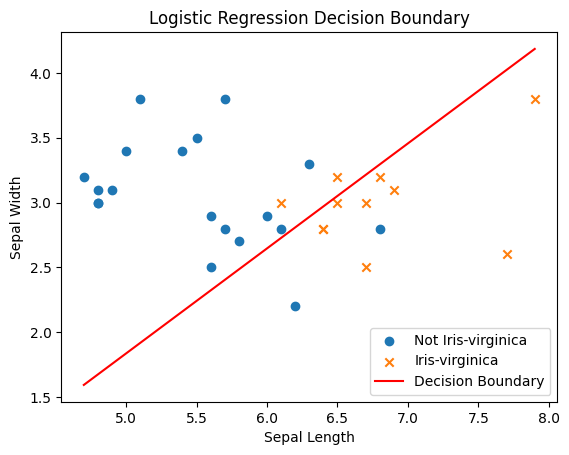

In [33]:
# Decision Boundary
x_values = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)
y_values = -(theta[0] + theta[1] * x_values) / theta[2]

# Plotting the data points
plt.scatter(X_test[y_test == 0][:, 1], X_test[y_test == 0][:, 2], label='Not Iris-virginica', marker='o')
plt.scatter(X_test[y_test == 1][:, 1], X_test[y_test == 1][:, 2], label='Iris-virginica', marker='x')

# Plotting the decision boundary
plt.plot(x_values, y_values, color='red', label='Decision Boundary')

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()




# Hyper-Parameters - **3**

In [64]:
learning_rate_3 = 0.009
num_iterations_3 = 30000

In [65]:
# Initialize weights (including bias) randomly
np.random.seed(0)
theta = np.random.rand(X_train.shape[1])

In [66]:
# Train the logistic regression model using gradient descent
theta = gradient_descent(X_train, y_train, theta, learning_rate_3, num_iterations_3)

Iteration 0, Log-likelihood: -1027.65464666024, Theta: [-0.17833274 -3.25549045 -1.65255578]
Iteration 1000, Log-likelihood: -258.54060572990363, Theta: [-15.88977516   8.82154113 -10.88289368]
Iteration 2000, Log-likelihood: -244.49377251435476, Theta: [-27.12437121   9.28195692  -7.95380442]
Iteration 3000, Log-likelihood: -230.7914799026848, Theta: [-36.06539424   9.45875333  -5.2717774 ]
Iteration 4000, Log-likelihood: -209.6494260345343, Theta: [-42.41162857   9.6208542   -3.59630028]
Iteration 5000, Log-likelihood: -194.96705752699202, Theta: [-46.44490413   9.76161286  -2.64688531]
Iteration 6000, Log-likelihood: -185.85987556108873, Theta: [-48.84984589   9.8439531   -2.09178878]
Iteration 7000, Log-likelihood: -180.5747949079813, Theta: [-50.15827306   9.88152604  -1.78263277]
Iteration 8000, Log-likelihood: -177.77769720558035, Theta: [-50.83213947   9.89829593  -1.62028932]
Iteration 9000, Log-likelihood: -176.35547041657472, Theta: [-51.17177257   9.90611497  -1.53769035]
I

In [67]:
# Predictions
def predict(X, theta):
    return Sigmoid(np.dot(X, theta))

In [68]:
# Evaluate on the test set
y_pred = predict(X_test, theta)
y_pred_binary = (y_pred >= 0.5).astype(int)


In [69]:
# Calculate accuracy
accuracy = np.mean(y_pred_binary == y_test)

# Print accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 70.00%


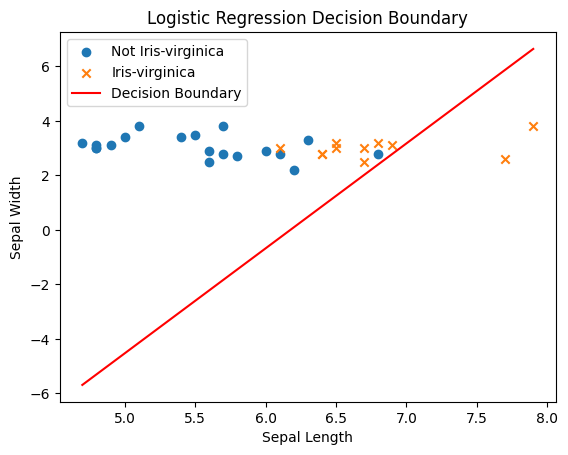

In [70]:
# Decision Boundary
x_values = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)
y_values = -(theta[0] + theta[1] * x_values) / theta[2]

# Plotting the data points
plt.scatter(X_test[y_test == 0][:, 1], X_test[y_test == 0][:, 2], label='Not Iris-virginica', marker='o')
plt.scatter(X_test[y_test == 1][:, 1], X_test[y_test == 1][:, 2], label='Iris-virginica', marker='x')

# Plotting the decision boundary
plt.plot(x_values, y_values, color='red', label='Decision Boundary')

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


